In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

## Reading in data

In [37]:
hp1 = pd.read_csv('HarrisPartI.csv')
hp2 = pd.read_csv('HarrisPartII.csv')
hp3 = pd.read_csv('HarrisPartIII.csv')
vbt = pd.read_csv('vandenBerg_table2.csv')
k21 = pd.read_csv('Krause21.csv')

## Checking heads of the dataframes

In [38]:
k21

,Class,Object,AltName,Mstar,rh,C5,Age,FeH
0,GC,NGC104,47Tuc,6.46,7.10,0.920,12.80,-0.76
1,GC,NGC288,Melotte3,0.46,9.80,0.050,12.20,-1.32
2,GC,NGC362,Dunlop62,2.50,3.50,0.720,10.00,-1.26
3,GC,NGC1261,Caldwell87,3.41,5.50,0.620,10.24,-1.08
4,GC,NGC1851,Dunlop508,5.51,3.05,1.810,7.64,-1.13
...,...,...,...,...,...,...,...,...
56,GC,NGC7089,M2,5.75,6.03,0.950,11.80,-1.31
57,GC,NGC7099,M30,1.45,4.10,0.350,14.60,-2.33
58,GC,Ruprecht106,NONE,0.68,11.00,0.060,12.00,-1.50
59,GC,Terzan7,NONE,0.39,8.70,0.040,7.40,-0.12


In [39]:
vbt

,#NGC,Name,FeH,Age,Age_err,Method,Figs,Range,HBtype,R_G,M_V,v_e0,log_sigma_0
0,104,47Tuc,-0.76,11.75,0.25,V,14,11.50–11.75,-0.99,7.4,-9.42,54.8,5.061
1,288,XXXX,-1.32,11.50,0.38,H,24,NaN,0.98,12.0,-6.75,10.9,2.953
2,362,XXXX,-1.30,10.75,0.25,V,13,10.75–11.00,-0.87,9.4,-8.43,44.4,4.938
3,1261,XXXX,-1.27,10.75,0.25,V,13,10.75–11.25,-0.71,18.1,-7.80,23.6,3.913
4,1851,XXXX,-1.18,11.00,0.25,V,13,10.75–11.25,-0.32,16.6,-8.33,47.6,5.136
5,2808,XXXX,-1.18,11.00,0.38,V,13,11.00–11.25,-0.49,11.1,-9.39,62.4,5.070
6,3201,XXXX,-1.51,11.50,0.38,A,12-30,11.25–11.75,0.08,8.8,-7.45,17.9,3.599
7,4147,XXXX,-1.78,12.25,0.25,V,11,12.25–12.50,0.66,21.4,-6.17,14.2,3.886
8,4590,M68,-2.27,12.00,0.25,V,11,12.00,0.17,10.2,-7.37,16.9,3.559
9,4833,XXXX,-1.89,12.50,0.50,A,30,NaN,0.93,7.0,-8.17,25.0,3.885


## Merging relevant columns from each the dataframes

Relevant data:
- Cluster Identification Number
- Age
- Distance from Galactic Center
- Galactic Distance component Z
- Metallicity Fe/H
- Weight of mean metallicity
- Heliocentric radial velocity
- Observational uncertainty in radial velocity
- Central velocity dispersion sig_v
- Observational uncertainty in central velocity dispersion

*Note: Only vbt has age data so if we want to use age plots, can only use the 55 NGC globular clusters in that table*

In [40]:
vbt.rename(columns={'#NGC':'ID'},inplace=True)
def add_NGC(s):
    return "NGC " + s
vbt['ID'] = vbt['ID'].apply(add_NGC)

In [41]:
hp1 = hp1.drop(columns=["Name","RA","DEC","L","B","R_Sun"])
hp2 = hp2.drop(columns=["E(B-V)","V_HB","(m-M)V","V_t","M_V,t","U-B","B-V","V-R","spt","ellip"])
hp3 = hp3.drop(columns=["v_LSR","c","r_c","r_h","mu_V","rho_0","lg_tc","lg_th"])
vbt = vbt.drop(columns=["Name","Method", "Figs", "Range","HBtype","R_G","M_V","v_e0","log_sigma_0"])

hp1['ID'] = hp1['ID'].str.replace('"', '')
hp2['ID'] = hp2['ID'].str.replace('"', '')
hp3['ID'] = hp3['ID'].str.replace('"', '')
vbt['ID'] = vbt['ID'].str.replace('"', '')

hp1['ID'] = hp1['ID'].str.strip()
hp2['ID'] = hp2['ID'].str.strip()
hp3['ID'] = hp3['ID'].str.strip()
vbt['ID'] = vbt['ID'].str.strip()

In [42]:
df0 = pd.merge(hp1,hp2,on='ID')
dfna = pd.merge(df0,hp3,on='ID')
dfa = pd.merge(dfna,vbt,on='ID')

Binning similar data points

In [43]:
dfa['FeH'] = dfa['FeH'].apply(lambda x: round(x, 1))
density = dfa.groupby(['Age', 'FeH'])['ID'].nunique().reset_index(name='density')

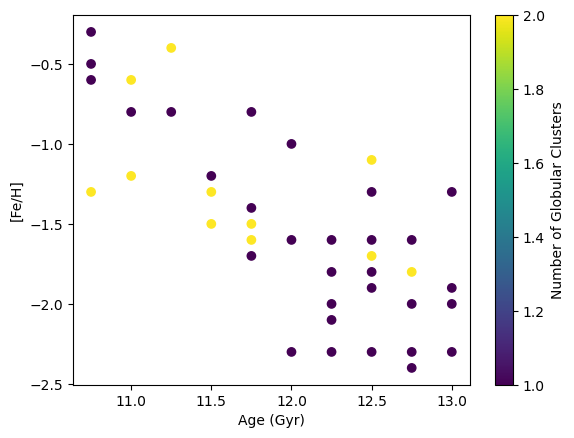

In [44]:
plt.scatter(
    density['Age'],
    density['FeH'],
    marker='o',
    c=density['density']
)

cbar = plt.colorbar()
cbar.set_label('Number of Globular Clusters')
plt.xlabel("Age (Gyr)")
plt.ylabel("[Fe/H]")
plt.savefig("agefeh.png", bbox_inches='tight', pad_inches=0.1)

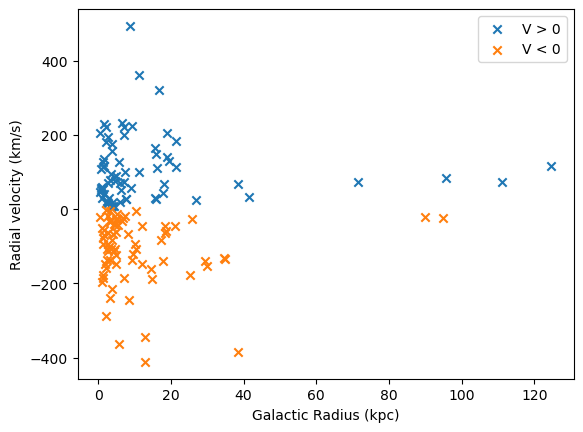

In [45]:
mask = dfna['v_r'] >= 0
plt.scatter(
    dfna['R_gc'][mask],
    dfna['v_r'][mask],
    marker='x',
    label= 'V > 0'
)

plt.scatter(
    dfna['R_gc'][~mask],
    dfna['v_r'][~mask],
    marker='x',
    label='V < 0'
)

plt.legend()
plt.xlabel("Galactic Radius (kpc)")
plt.ylabel("Radial velocity (km/s)")
plt.savefig("rgcvr.png", bbox_inches='tight', pad_inches=0.1)

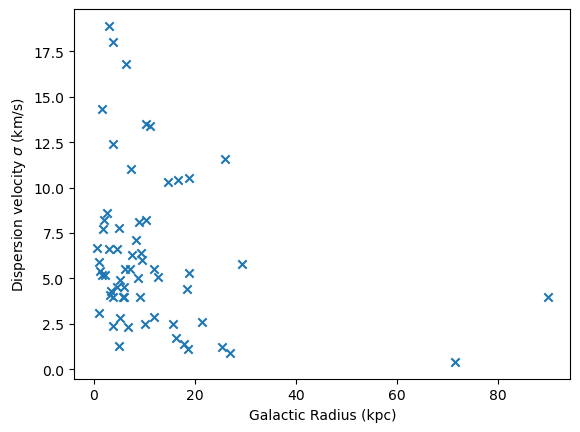

In [46]:
plt.scatter(
    dfna['R_gc'],
    dfna['sig_v'],
    marker='x'
)

plt.xlabel("Galactic Radius (kpc)")
plt.ylabel(r"Dispersion velocity $\sigma$ (km/s)")
plt.savefig("rgcsigv.png", bbox_inches='tight', pad_inches=0.1)

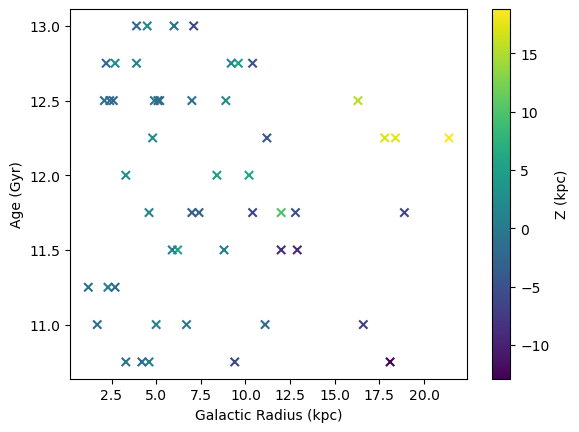

In [47]:
plt.scatter(
    dfa['R_gc'],
    dfa['Age'],
    marker='x',
    c=dfa['Z']
)

plt.xlabel("Galactic Radius (kpc)")
plt.ylabel("Age (Gyr)")
cbar = plt.colorbar()
cbar.set_label('Z (kpc)')
plt.savefig("agergc.png", bbox_inches='tight', pad_inches=0.1)

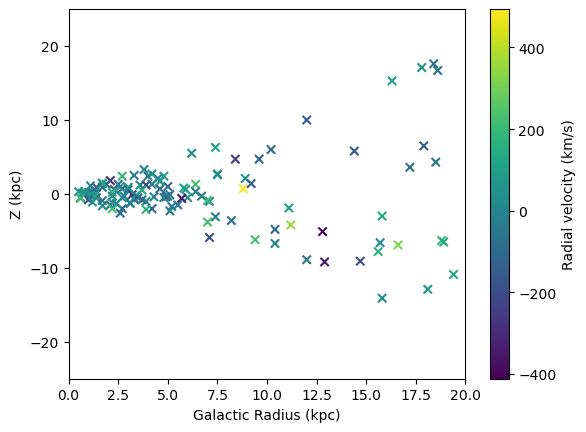

In [48]:
plt.scatter(
    dfna['R_gc'],
    dfna['Z'],
    marker='x',
    c=dfna['v_r']
)

plt.xlim(0,20)
plt.ylim(-25,25)
plt.xlabel("Galactic Radius (kpc)")
cbar = plt.colorbar()
cbar.set_label('Radial velocity (km/s)')
plt.ylabel("Z (kpc)")
plt.savefig("rgczvr.png", bbox_inches='tight', pad_inches=0.1)

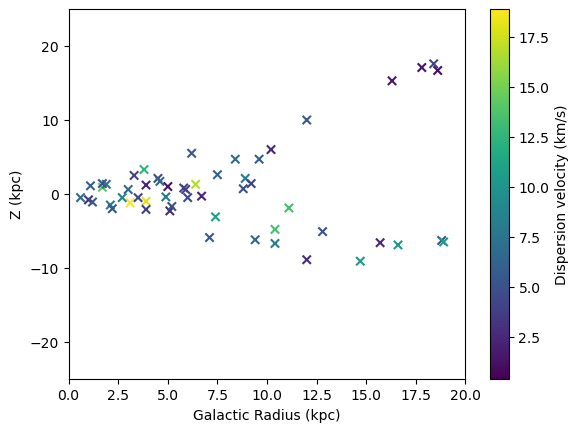

In [49]:
plt.scatter(
    dfna['R_gc'],
    dfna['Z'],
    marker='x',
    c=dfna['sig_v']
)

plt.xlim(0,20)
plt.ylim(-25,25)
plt.xlabel("Galactic Radius (kpc)")
cbar = plt.colorbar()
cbar.set_label('Dispersion velocity (km/s)')
plt.ylabel("Z (kpc)")
plt.savefig("rgczsigv.png", bbox_inches='tight', pad_inches=0.1)

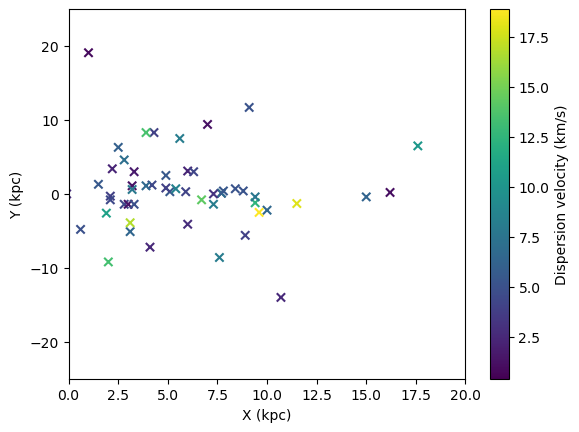

In [50]:
plt.scatter(
    dfna['X'],
    dfna['Y'],
    marker='x',
    c=dfna['sig_v']
)

plt.xlim(0,20)
plt.ylim(-25,25)
plt.xlabel("X (kpc)")
cbar = plt.colorbar()
cbar.set_label('Dispersion velocity (km/s)')
plt.ylabel("Y (kpc)")
plt.savefig("xysigv.png", bbox_inches='tight', pad_inches=0.1)

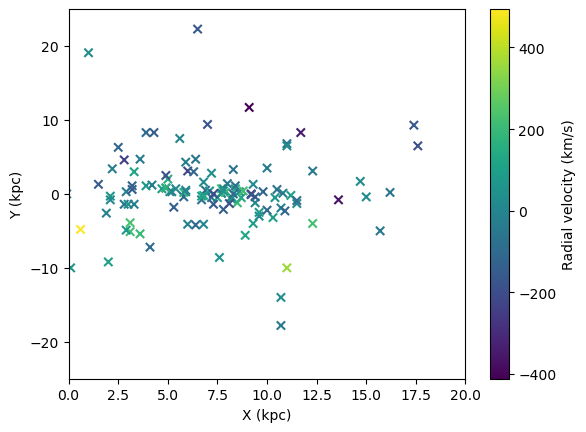

In [51]:
plt.scatter(
    dfna['X'],
    dfna['Y'],
    marker='x',
    c=dfna['v_r']
)

plt.xlim(0,20)
plt.ylim(-25,25)
plt.xlabel("X (kpc)")
cbar = plt.colorbar()
cbar.set_label('Radial velocity (km/s)')
plt.ylabel("Y (kpc)")
plt.savefig("xyvr.png", bbox_inches='tight', pad_inches=0.1)

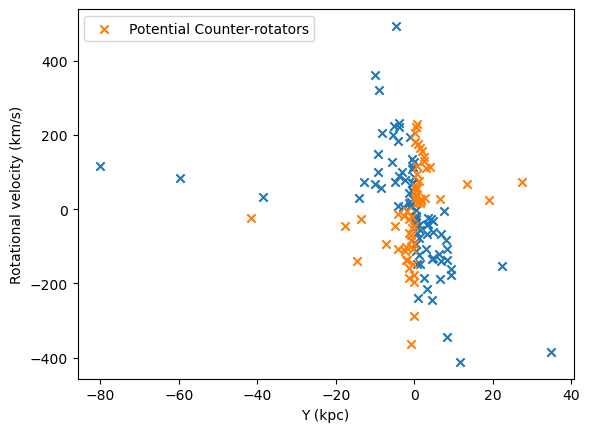

In [52]:
mask = ((dfna['Y'] > 0) & (dfna['v_r'] < 0)) | ((dfna['Y'] < 0) & (dfna['v_r'] > 0))

plt.scatter(
    dfna['Y'][mask],
    dfna['v_r'][mask],
    marker='x',
)

plt.scatter(
    dfna['Y'][~mask],
    dfna['v_r'][~mask],
    marker='x',
    label='Potential Counter-rotators'
)

plt.xlabel("Y (kpc)")
plt.ylabel("Rotational velocity (km/s)")
plt.legend()
plt.savefig("yvr.png", bbox_inches='tight', pad_inches=0.1)

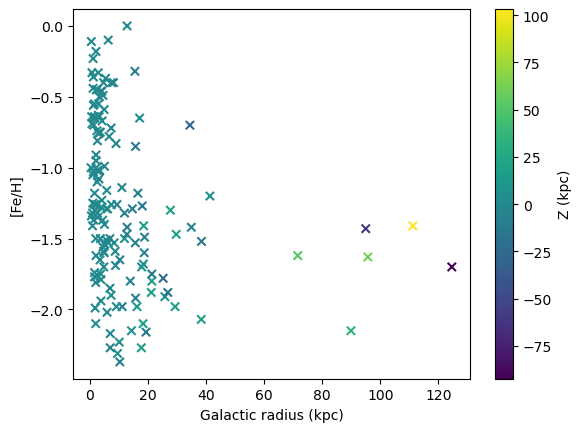

In [53]:
dfna['[Fe/H]'] = pd.to_numeric(dfna['[Fe/H]'],errors='coerce')
plt.scatter(
    dfna['R_gc'],
    dfna['[Fe/H]'],
    marker='x',
    c=dfna['Z']
)

plt.xlabel("Galactic radius (kpc)")
plt.ylabel("[Fe/H]")
cbar = plt.colorbar()
cbar.set_label('Z (kpc)')
plt.savefig("fehrgc.png", bbox_inches='tight', pad_inches=0.1)

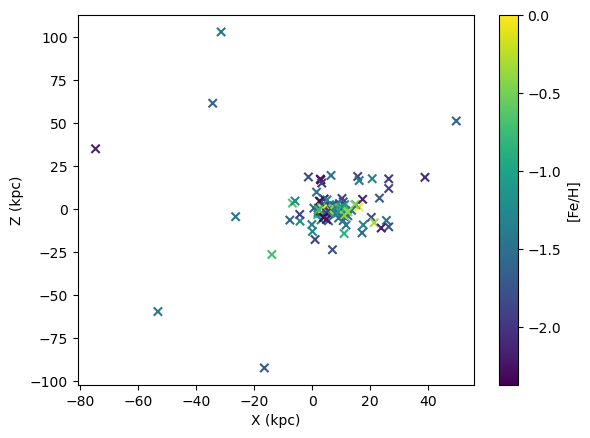

In [54]:
dfna['[Fe/H]'] = pd.to_numeric(dfna['[Fe/H]'],errors='coerce')
plt.scatter(
    dfna['X'],
    dfna['Z'],
    marker='x',
    c=dfna['[Fe/H]']
)

cbar = plt.colorbar()
cbar.set_label('[Fe/H]')
plt.xlabel("X (kpc)")
plt.ylabel("Z (kpc)")
plt.savefig("xzfeh.png", bbox_inches='tight', pad_inches=0.1)

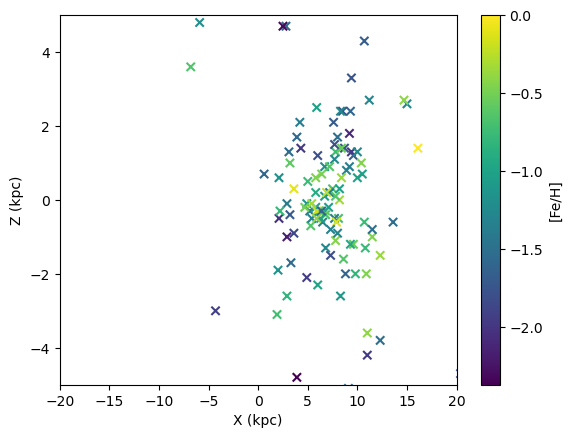

In [55]:
dfna['[Fe/H]'] = pd.to_numeric(dfna['[Fe/H]'],errors='coerce')
plt.scatter(
    dfna['X'],
    dfna['Z'],
    marker='x',
    c=dfna['[Fe/H]']
)

cbar = plt.colorbar()
cbar.set_label('[Fe/H]')
plt.xlabel("X (kpc)")
plt.ylabel("Z (kpc)")
plt.xlim(-20,20)
plt.ylim(-5,5)
plt.savefig("xzfeh1.png", bbox_inches='tight', pad_inches=0.1)

In [56]:
dfa['V-I'] = pd.to_numeric(dfa['V-I'],errors='coerce')
dfa['V-I'] = dfa['V-I']*1.18 + 0.37

In [57]:
dfna['V-I'] = pd.to_numeric(dfna['V-I'],errors='coerce')
dfna['V-I'] = dfna['V-I']*1.18 + 0.37

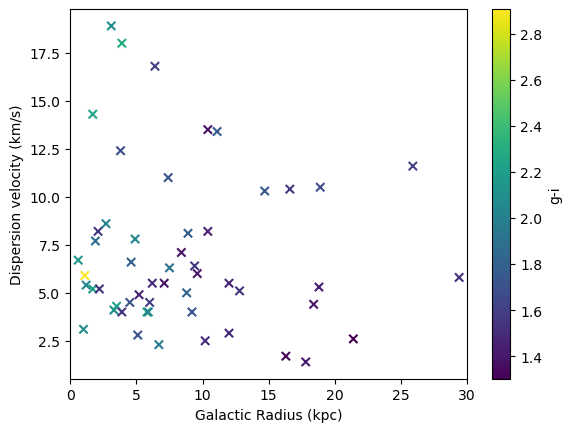

In [58]:
plt.scatter(
    dfna['R_gc'],
    dfna['sig_v'],
    marker='x',
    c=dfna['V-I']
)

plt.xlim(0,30)
plt.xlabel("Galactic Radius (kpc)")
cbar = plt.colorbar()
cbar.set_label('g-i')
plt.ylabel("Dispersion velocity (km/s)")
plt.savefig("rgcsigv.png", bbox_inches='tight', pad_inches=0.1)

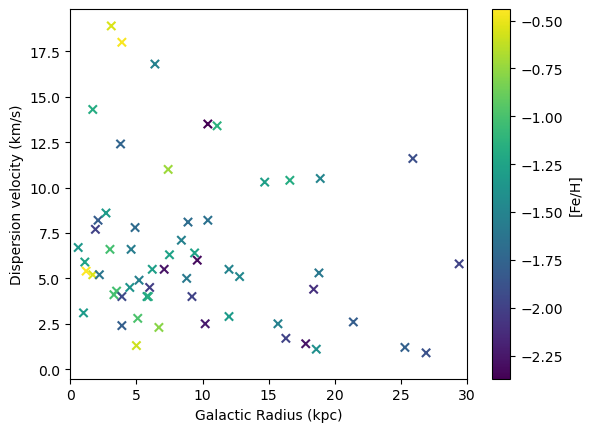

In [59]:
plt.scatter(
    dfna['R_gc'],
    dfna['sig_v'],
    marker='x',
    c=dfna['[Fe/H]']
)

plt.xlim(0,30)
plt.xlabel("Galactic Radius (kpc)")
cbar = plt.colorbar()
cbar.set_label('[Fe/H]')
plt.ylabel("Dispersion velocity (km/s)")
plt.savefig("rgcsigv1.png", bbox_inches='tight', pad_inches=0.1)

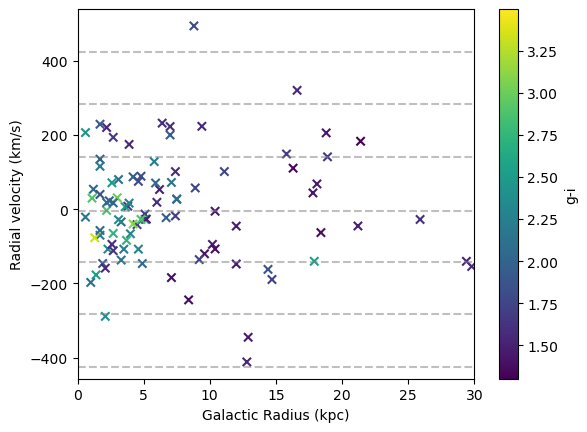

In [60]:
plt.scatter(
    dfna['R_gc'],
    dfna['v_r'],
    marker='x',
    c=dfna['V-I']
)

plt.axhline(y=141.4,color='grey',linestyle='--',alpha=0.5)
plt.axhline(y=-141.4,color='grey',linestyle='--',alpha=0.5)
plt.axhline(y=2*141.4,color='grey',linestyle='--',alpha=0.5)
plt.axhline(y=-2*141.4,color='grey',linestyle='--',alpha=0.5)
plt.axhline(y=-4.7,color='grey',linestyle='--',alpha=0.5)
plt.axhline(y=3*141.4,color='grey',linestyle='--',alpha=0.5)
plt.axhline(y=-3*141.4,color='grey',linestyle='--',alpha=0.5)

plt.xlim(0,30)
plt.xlabel("Galactic Radius (kpc)")
cbar = plt.colorbar()
cbar.set_label('g-i')
plt.ylabel("Radial velocity (km/s)")
plt.savefig("rgcvr.png", bbox_inches='tight', pad_inches=0.1)

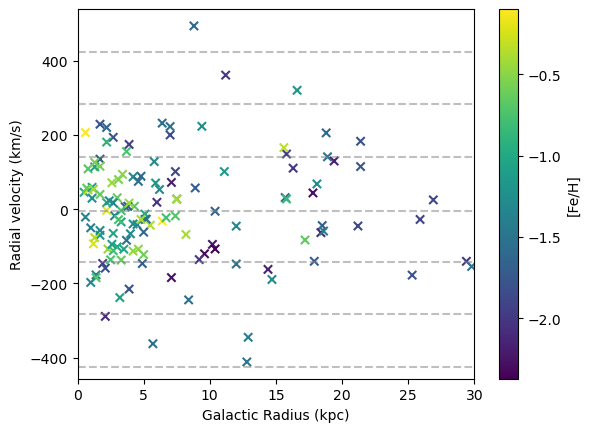

In [61]:
plt.scatter(
    dfna['R_gc'],
    dfna['v_r'],
    marker='x',
    c=dfna['[Fe/H]']
)

plt.axhline(y=141.4,color='grey',linestyle='--',alpha=0.5)
plt.axhline(y=-141.4,color='grey',linestyle='--',alpha=0.5)
plt.axhline(y=2*141.4,color='grey',linestyle='--',alpha=0.5)
plt.axhline(y=-2*141.4,color='grey',linestyle='--',alpha=0.5)
plt.axhline(y=-4.7,color='grey',linestyle='--',alpha=0.5)
plt.axhline(y=3*141.4,color='grey',linestyle='--',alpha=0.5)
plt.axhline(y=-3*141.4,color='grey',linestyle='--',alpha=0.5)

plt.xlim(0,30)
plt.xlabel("Galactic Radius (kpc)")
cbar = plt.colorbar()
cbar.set_label('[Fe/H]')
plt.ylabel("Radial velocity (km/s)")
plt.savefig("rgcvr1.png", bbox_inches='tight', pad_inches=0.1)

-4.722377622377622 141.4102811365925


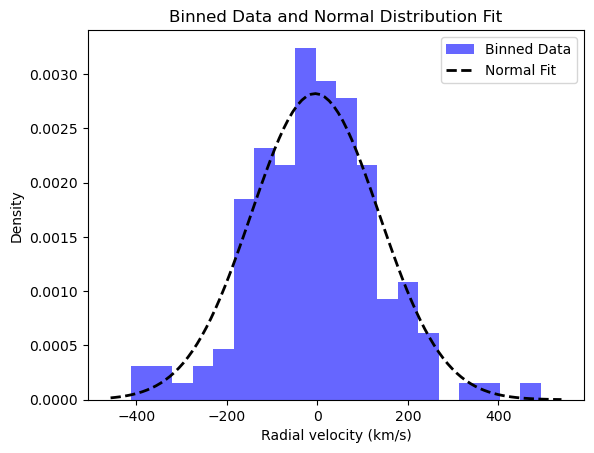

In [65]:
# Assuming dfna is your DataFrame with NaN values in the 'v_r' column

# 1. Remove NaN values
dfna_clean = dfna['v_r'].dropna()

# 2. Plot the histogram to visualize the distribution
plt.hist(dfna_clean, bins=20, density=True, alpha=0.6, color='b', label='Binned Data')

# 3. Fit a normal distribution and overlay the curve (Optional)
mu, std = norm.fit(dfna_clean)  # Get mean and standard deviation
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Fit',linestyle='--')
print(mu,std)

# 4. Add labels and show the plot
plt.xlabel('Radial velocity (km/s)')
plt.ylabel('Density')
plt.title('Binned Data and Normal Distribution Fit')
plt.legend()
plt.savefig("norm1.png", bbox_inches='tight', pad_inches=0.1)
plt.show()

6.300000000000001 4.179597140642208


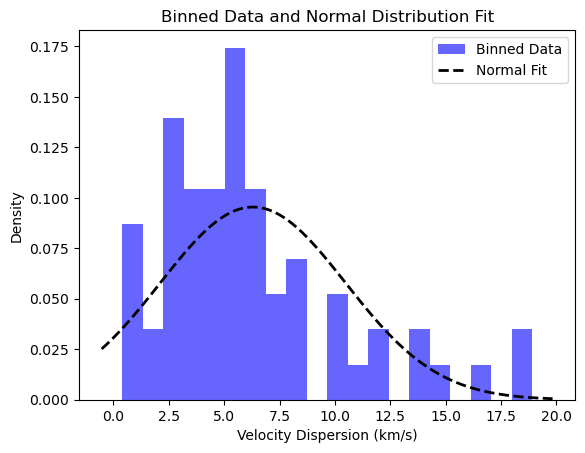

In [67]:
# 1. Remove NaN values
dfna_clean = dfna['sig_v'].dropna()

# 2. Plot the histogram to visualize the distribution
plt.hist(dfna_clean, bins=20, density=True, alpha=0.6, color='b', label='Binned Data')

# 3. Fit a normal distribution and overlay the curve (Optional)
mu, std = norm.fit(dfna_clean)  # Get mean and standard deviation
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Fit',linestyle='--')
print(mu,std)

# 4. Add labels and show the plot
plt.xlabel('Velocity Dispersion (km/s)')
plt.ylabel('Density')
plt.title('Binned Data and Normal Distribution Fit')
plt.legend()
plt.savefig("norm2.png", bbox_inches='tight', pad_inches=0.1)
plt.show()

In [64]:
dfa

,ID,R_gc,X,Y,Z,[Fe/H],wt,V-I,v_r,v_r_e,sig_v,sig_v_e,FeH,Age,Age_err
0,NGC 104,7.4,1.9,-2.6,-3.1,-0.72,10,1.7152,-18.0,0.1,11.0,0.3,-0.8,11.75,0.25
1,NGC 288,12.0,-0.1,0.0,-8.9,-1.32,3,1.4792,-45.4,0.2,2.9,0.3,-1.3,11.50,0.38
2,NGC 362,9.4,3.1,-5.1,-6.2,-1.26,5,1.5618,223.5,0.5,6.4,0.3,-1.3,10.75,0.25
3,NGC 1261,18.1,0.1,-10.0,-12.9,-1.27,3,1.4674,68.2,4.6,NaN,NaN,-1.3,10.75,0.25
4,NGC 1851,16.6,-4.2,-8.9,-6.9,-1.18,9,1.5618,320.5,0.6,10.4,0.5,-1.2,11.00,0.25
5,NGC 2808,11.1,2.0,-9.2,-1.9,-1.14,4,1.7624,101.6,0.7,13.4,1.2,-1.2,11.00,0.38
6,NGC 3201,8.8,0.6,-4.8,0.7,-1.59,5,1.8214,494.0,0.2,5.0,0.2,-1.5,11.50,0.38
7,NGC 4147,21.4,-1.3,-4.1,18.8,-1.8,4,1.3022,183.2,0.7,2.6,0.7,-1.8,12.25,0.25
8,NGC 4590,10.2,4.1,-7.2,6.0,-2.23,5,1.4792,-94.7,0.2,2.5,0.4,-2.3,12.00,0.25
9,NGC 4833,7.0,3.6,-5.4,-0.9,-1.85,4,1.9394,200.2,1.2,NaN,NaN,-1.9,12.50,0.50
